In [1]:
from funcs.notebook import *

In [2]:
df = pd.read_csv("../results/kstests.csv")

In [3]:
# select the latest results
df = df[df.tstamp>="2021-09-01"]
df

,tstamp,period,sector,subsample,D+,p+,D-,p-,D,p,nflares,totobs_days,phaseshift
0,2021-09-02,Orbit,Both Sectors,total,0.047619,0.411351,0.083948,0.065813,0.083948,0.131590,189,48.449074,0.0
1,2021-09-02,Orbit,Both Sectors,total,0.024503,0.784245,0.107064,0.012150,0.107064,0.024300,189,48.449074,0.1
2,2021-09-02,Orbit,Both Sectors,total,0.050278,0.372151,0.081289,0.077864,0.081289,0.155658,189,48.449074,0.2
3,2021-09-02,Orbit,Both Sectors,total,0.124685,0.002545,0.006881,0.977806,0.124685,0.005090,189,48.449074,0.3
4,2021-09-02,Orbit,Both Sectors,total,0.077809,0.096247,0.053757,0.323800,0.077809,0.192328,189,48.449074,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2021-11-10,Rotation,Sector 27,low energy half,0.075046,0.382491,0.056406,0.575823,0.075046,0.723018,81,23.318519,0.5
470,2021-11-10,Rotation,Sector 27,low energy half,0.048246,0.664730,0.083206,0.308596,0.083206,0.599433,81,23.318519,0.6
471,2021-11-10,Rotation,Sector 27,low energy half,0.074005,0.392495,0.057447,0.564497,0.074005,0.738480,81,23.318519,0.7
472,2021-11-10,Rotation,Sector 27,low energy half,0.036087,0.790970,0.095365,0.215263,0.095365,0.426372,81,23.318519,0.8


In [4]:
groupedmed = df.groupby(["period", "sector", "subsample"]).p.min()

groupedvar = df.groupby(["period", "sector", "subsample"]).p.max()

In [5]:
d = pd.DataFrame({"pval":groupedmed, "sig":groupedvar})
d

pval       sig
period      sector       subsample                           
Beat Period Both Sectors high energy half  0.063368  0.558770
                         low energy half   0.075558  0.713770
                         total             0.655823  0.992569
            Sector 1     high energy half  0.168490  0.693607
                         low energy half   0.102224  0.781055
                         total             0.422986  0.920208
            Sector 27    high energy half  0.019951  0.491192
                         low energy half   0.279256  0.961510
                         total             0.402188  0.917704
Orbit       Both Sectors high energy half  0.001725  0.236953
                         low energy half   0.176076  0.773865
                         total             0.005090  0.281659
            Sector 1     high energy half  0.022352  0.479536
                         low energy half   0.004430  0.365509
                         total             0.026479  0.362609
            Sector 27    high energy half  0.023058  0.566488
                         low energy half   0.051369  0.588534
                         total             0.028480  0.424198
Rotation    Both Sectors high energy half  0.060307  0.697573
                         low energy half   0.150919  0.758111
                         total             0.037887  0.353931
            Sector 1     high energy half  0.050152  0.698106
                         low energy half   0.126246  0.806388
                         total             0.136419  0.751883
            Sector 27    high energy half  0.003677  0.288426
                         low energy half   0.150786  0.738480
                         total             0.010916  0.421943

In [6]:
dd = d.apply(lambda x: fr"${x.pval:.4f}\pm {x.sig:.2f}$", axis=1)

In [7]:
ddd = dd.unstack(level=0).T

In [8]:
groupedn = df.groupby(["period", "sector", "subsample"]).nflares.first().unstack(level=0).T.iloc[0]
groupedn = groupedn.rename("# flares")

In [9]:
dddd = ddd.append(groupedn)
names = [r'$n$', "$p(P_{orb})$", "$p(P_{rot})$", "$p(P_{syn})$"]
oldnames = [r'# flares', "Orbit", "Rotation", "Beat Period"]
dddd = dddd.T.rename(index=str, columns=dict(zip(oldnames, names))).T
dddd

sector            Both Sectors                                      \
subsample     high energy half   low energy half             total   
period                                                               
$p(P_{syn})$  $0.0634\pm 0.56$  $0.0756\pm 0.71$  $0.6558\pm 0.99$   
$p(P_{orb})$  $0.0017\pm 0.24$  $0.1761\pm 0.77$  $0.0051\pm 0.28$   
$p(P_{rot})$  $0.0603\pm 0.70$  $0.1509\pm 0.76$  $0.0379\pm 0.35$   
$n$                         71               118               189   

sector                Sector 1                                      \
subsample     high energy half   low energy half             total   
period                                                               
$p(P_{syn})$  $0.1685\pm 0.69$  $0.1022\pm 0.78$  $0.4230\pm 0.92$   
$p(P_{orb})$  $0.0224\pm 0.48$  $0.0044\pm 0.37$  $0.0265\pm 0.36$   
$p(P_{rot})$  $0.0502\pm 0.70$  $0.1262\pm 0.81$  $0.1364\pm 0.75$   
$n$                         38                37                75   

sector               Sector 27                                      
subsample     high energy half   low energy half             total  
period                                                              
$p(P_{syn})$  $0.0200\pm 0.49$  $0.2793\pm 0.96$  $0.4022\pm 0.92$  
$p(P_{orb})$  $0.0231\pm 0.57$  $0.0514\pm 0.59$  $0.0285\pm 0.42$  
$p(P_{rot})$  $0.0037\pm 0.29$  $0.1508\pm 0.74$  $0.0109\pm 0.42$  
$n$                         33                81               114

In [11]:
stri = dddd.T[names].to_latex(index=True, escape=False, column_format=f"llcccc")
stri = stri.replace("\\toprule","\hline")
stri = stri.replace("\\midrule","\hline")
stri = stri.replace("{}","\hline")
stri = stri.replace("\\bottomrule","\hline\n" )
stri = stri.replace("%","\%" )
stri = stri.replace("high energy half","$ED>1\,$s")
stri = stri.replace("low energy half","$ED<1\,$s")
stri = stri.replace("Both Sectors","both")
stri = stri.replace("Sector 27","27")
stri = stri.replace("Sector 1","1")
stri = stri.replace("subsample &      &","sample &     $n$ &")
stri = stri.replace("period","")
stri = stri.replace("&  $n$ &    $","&      &    $") 
# stri = stri.replace("$0.26\pm 0.23$","$\mathbf{0.26\pm 0.23}$") 

print(stri)

\begin{tabular}{llcccc}
\hline
          &  &      &    $p(P_{orb})$ &    $p(P_{rot})$ &    $p(P_{syn})$ \\
sector & sample &     $n$ &                 &                 &                 \\
\hline
both & $ED>1\,$s &   71 &  $0.07\pm 0.10$ &  $0.38\pm 0.22$ &  $0.28\pm 0.14$ \\
          & $ED<1\,$s &  118 &  $0.46\pm 0.22$ &  $0.45\pm 0.23$ &  $0.40\pm 0.25$ \\
          & total &  189 &  $0.09\pm 0.09$ &  $0.15\pm 0.11$ &  $0.87\pm 0.12$ \\
1 & $ED>1\,$s &   38 &  $0.20\pm 0.17$ &  $0.32\pm 0.20$ &  $0.43\pm 0.18$ \\
          & $ED<1\,$s &   37 &  $0.15\pm 0.12$ &  $0.54\pm 0.23$ &  $0.49\pm 0.25$ \\
          & total &   75 &  $0.16\pm 0.13$ &  $0.38\pm 0.21$ &  $0.70\pm 0.19$ \\
27 & $ED>1\,$s &   33 &  $0.17\pm 0.19$ &  $0.12\pm 0.10$ &  $0.26\pm 0.18$ \\
          & $ED<1\,$s &   81 &  $0.36\pm 0.19$ &  $0.53\pm 0.20$ &  $0.67\pm 0.27$ \\
          & total &  114 &  $0.21\pm 0.13$ &  $0.21\pm 0.16$ &  $0.74\pm 0.18$ \\
\hline

\end{tabular}



In [12]:
with open("/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/tables/pvalsks.tex", "w") as f:
    f.write(stri)

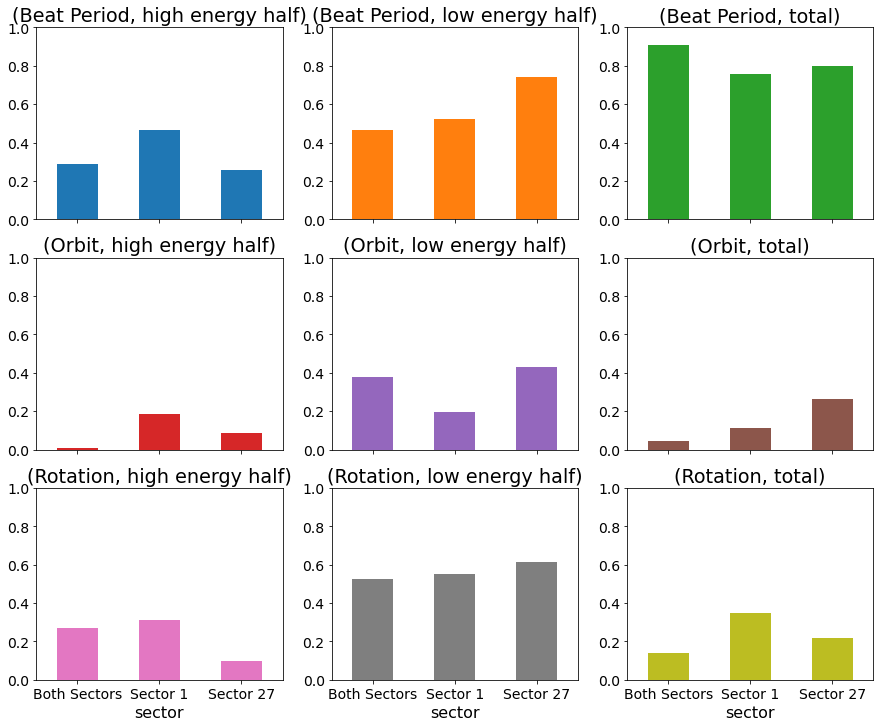

In [10]:
f = df.groupby(["period", "sector","subsample"]).p.median()
f.unstack(level=0).unstack(level=1).plot(kind='bar', subplots=True, rot=0, 
                                         figsize=(15, 12), layout=(3, 3), legend=False,
                                         ylim=(0,1));